### seaborn, pairplot 이용

### 상관관계는 굉장한 곡선이나, 복잡하게 나타난다 
    => 간단하게 해석할수 있는 일직선으로 나타나지는 않는다  
    => 그래서 multi col linearity 라고 한다
    
    => VIF 이란??

### multicollinearity negative impacts. 
    1. 기대한건 positive인데 실제로는 negative인 경우 
    2. std가 클때,
    
    ==> 그래서 2가지 방법으로도 봐야된다 
    1. 각각의 함수 상관관계를 본다 (plot을 통해서) 
    2. 각각 함수의 VIF 를 본다 
    
    vif란??

### Multicollinearity & VIFs

In [4]:
import numpy as np
import pandas as pd 
import seaborn as sns 
from patsy import dmatrices
import statsmodels.api as sm; 
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline 

df = pd.read_csv('./house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


## 1. use seaborn to loot at pairwise relationship for all quantitative. 

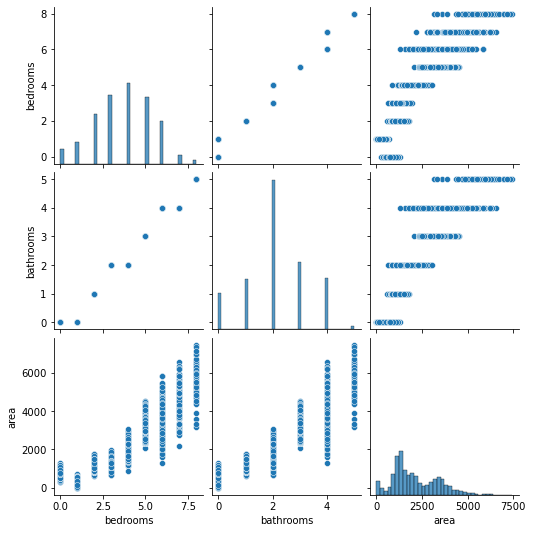

In [5]:
sns.pairplot(df[['bedrooms','bathrooms','area']])

### 2. fit a linear model to predict home price using 
    => bedrooms, bathrooms, area, intercept

In [6]:
df['intercept'] = 1 

lm = sm.OLS(df['price'],df[['intercept','bedrooms','bathrooms','area']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:04:59   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 3. calculate VIFs 

In [7]:
y, X = dmatrices('price ~ area + bedrooms + bathrooms',df,return_type='dataframe')

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] =X.columns

In [8]:
vif

,VIF Factor,features
0,7.327102,Intercept
1,5.458190,area
2,20.854484,bedrooms
3,19.006851,bathrooms


In [9]:
# remove bathrooms, bedroom, area, intercept 

lm = sm.OLS(df['price'],df[['intercept','area','bedrooms']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     6345.
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:09:39   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6025   BIC:                         1.691e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7857.4509   9425.288      0.834      0.405   -1.06e+04    2.63e+04
area         346.4458      7.152     48.443      0.000     332.426     360.466
bedrooms    1626.8306   5191.702      0.313      0.754   -8550.763    1.18e+04
==============================================================================
Omnibus:                      368.146   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.224
Skew:                           0.535   Prob(JB):                     8.91e-77
Kurtosis:                       2.502   Cond. No.                     6.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# calculate vifs 
y, X = dmatrices('price ~ area + bedrooms ',df,return_type='dataframe')

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] =X.columns

In [11]:
vif

,VIF Factor,features
0,6.063895,Intercept
1,5.345400,area
2,5.345400,bedrooms
